# Extended Data Figure 10: Spikes and calcium signaling reveal similar embeddings

#### import plot and data loading dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import joblib as jl
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
data = pd.read_hdf("../data/EDFigure10.h5", key="data")

In [3]:
shuffled_embs = data["embedding"]["shuffled"]
non_shuffled_embs = data["embedding"]["non-shuffled"]

### Plot Allen data, 4 mice

- As a control experiment we shuffled DINO features: CEBRA-Behavior used the DINO features as behavior labels and CEBRA-Shuffled used the shuffled DINO features. We shuffled the frame order of DINO features within a repeat. Same shuffled order was use for all repeats. Color code is frame number from the movie. The prediction is considered as true if the predicted frame is within 1 sec from the true frame, and the accuracy (\%) is noted next to the embedding. For Mice ID 1-4: 337, 353, 397, 475 neurons were recorded, respectively.

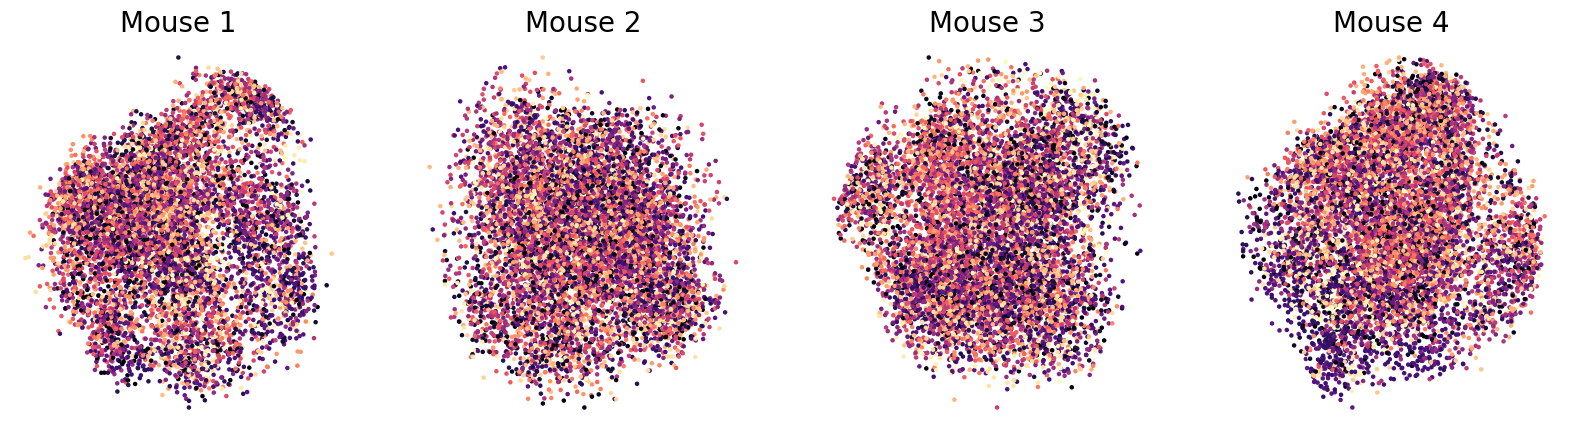

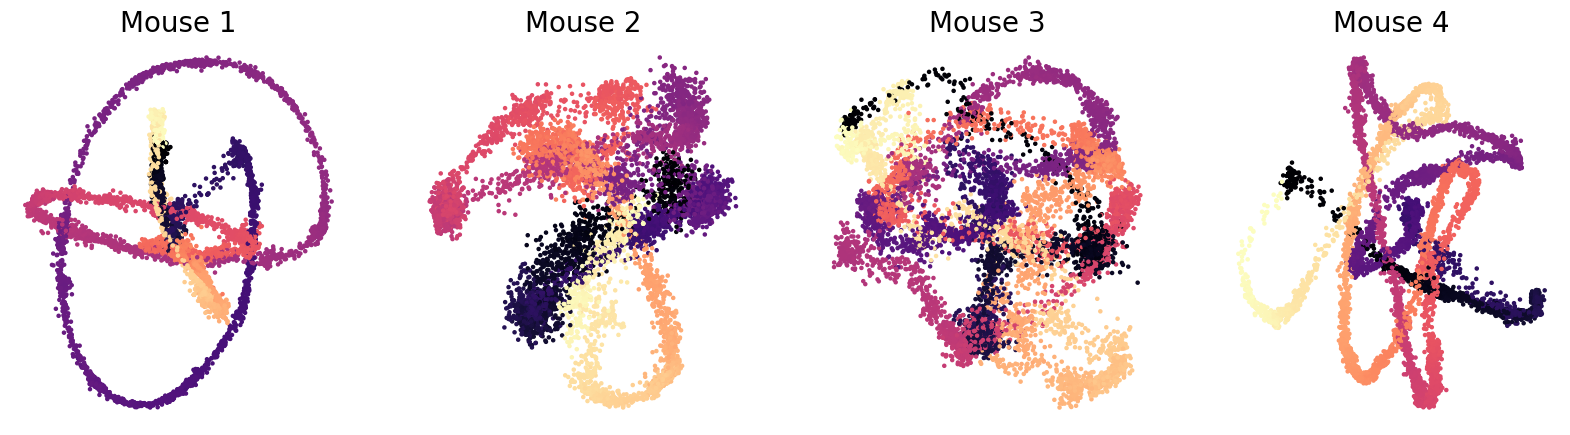

In [4]:
idx1, idx2 = 0, 1
plt.figure(figsize=(20, 5))
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    ax.scatter(
        shuffled_embs["feature"][i][:, idx1],
        shuffled_embs["feature"][i][:, idx2],
        s=5,
        c=np.tile(shuffled_embs["label"][i], 10),
        cmap="magma",
    )
    plt.axis("off")
    ax.set_title(f"Mouse {i+1}", fontsize=20)
plt.figure(figsize=(20, 5))
for i in range(4):
    ax = plt.subplot(1, 4, i + 1)
    ax.scatter(
        non_shuffled_embs["feature"][i][:, idx1],
        non_shuffled_embs["feature"][i][:, idx2],
        s=5,
        c=np.tile(non_shuffled_embs["label"][i], 10),
        cmap="magma",
    )
    plt.axis("off")
    ax.set_title(f"Mouse {i+1}", fontsize=20)

- "The prediction is considered as true if the predicted frame is within 1 sec from the true frame, and the accuracy (\%) is noted next to the embedding."

In [5]:
non_shuffled_decoding = data["decoding"]["ca_non_shuffled"]
shuffled_decoding = data["decoding"]["ca_shuffled"]
print("Frame No. Decoding Acc (%, 1s frame window) \n")
for i in range(1, 5):
    print(
        f"Mouse {i}: \n DINO {non_shuffled_decoding[i-1]:.2f} \n DINO-shuffled {shuffled_decoding[i-1]:.2f}"
    )

Frame No. Decoding Acc (%, 1s frame window) 

Mouse 1: 
 DINO 72.33 
 DINO-shuffled 9.44
Mouse 2: 
 DINO 49.67 
 DINO-shuffled 6.56
Mouse 3: 
 DINO 60.44 
 DINO-shuffled 9.11
Mouse 4: 
 DINO 74.33 
 DINO-shuffled 8.22


### Consistency between the single modality embedding and jointly trained embedding from CEBRA.

- a:  In higher dimensions, the embedding from single recording modality and the jointly trained embedding became highly consistent with more number of neurons. b: Consistency of embeddings from two recording modalities, when single modality was trained each and jointly trained. The consistency significantly improved with joint training. In higher dimensions, consistency between single modality embeddings improved as well, which shows that CEBRA can find 'common latents' in two different recording methods (that is theoretically meant to have same information) even without joint training (yet, joint training improves consistency). This data is also presented in Fig. 4e, h, but here plotted together to show improvement with joint training.

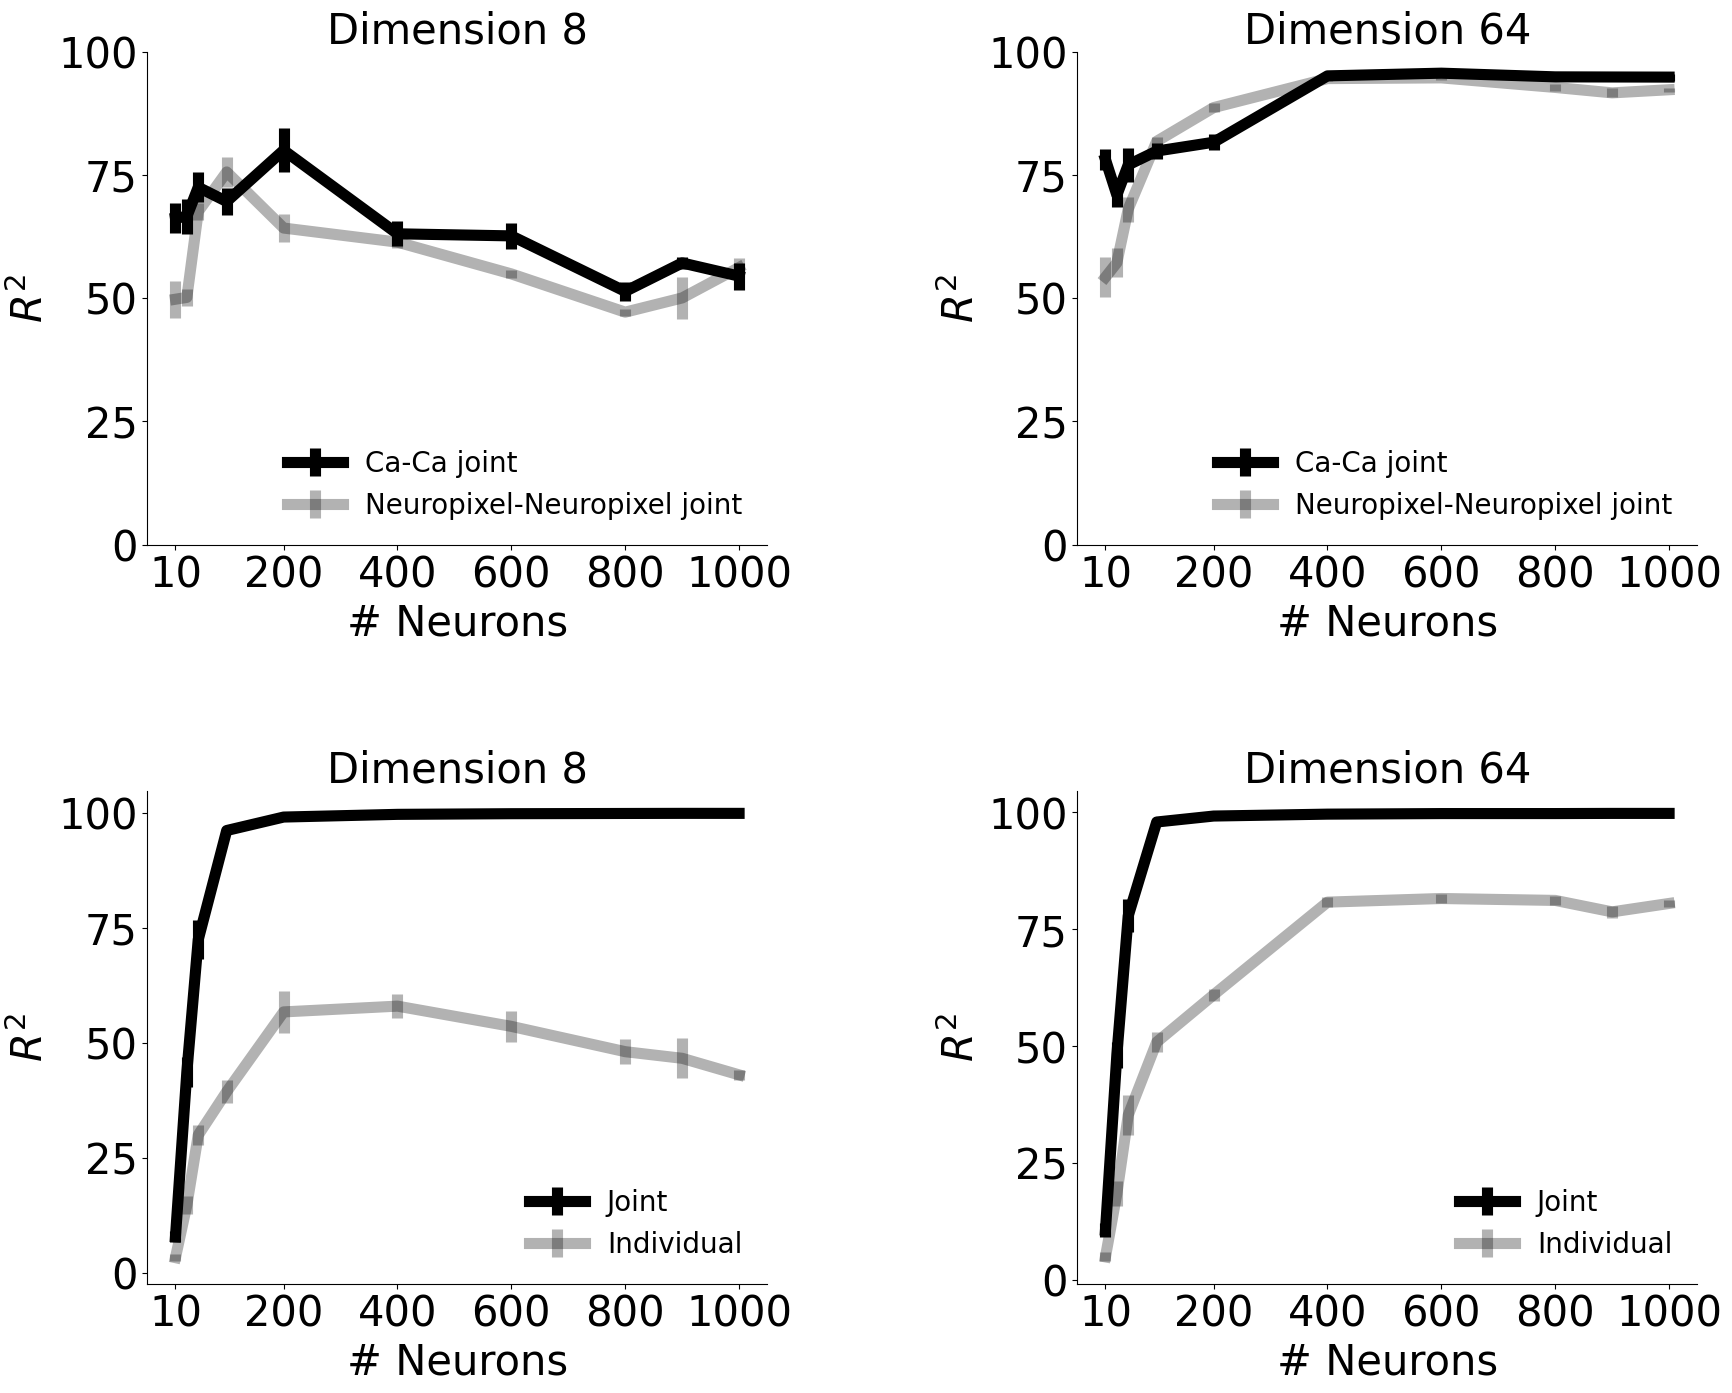

In [6]:
def get_mean_err_dic(score_dic):
    means = []
    errs = []
    for k in score_dic:
        means.append(np.mean(np.array(score_dic[k]) * 100))
        errs.append(
            np.std(np.array(score_dic[k]) * 100, ddof=1) / np.sqrt(len(score_dic[k]))
        )
    return means, errs


def set_ax(ax):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xticks(
        [10, 200, 400, 600, 800, 1000], [10, 200, 400, 600, 800, 1000], fontsize=30
    )
    ax.set_yticks(
        np.linspace(0, 100, 5), np.linspace(0, 100, 5).astype(int), fontsize=30
    )
    ax.set_xlabel("# Neurons", fontsize=30)
    ax.set_ylabel("$R^2$", fontsize=30)
    l1 = ax.legend(fontsize=20, loc="lower right", title_fontsize=15, frameon=False)


fig = plt.figure(figsize=(20, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ns = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]
for i, d in enumerate([8, 64]):
    ax1 = plt.subplot(2, 2, i + 1)

    ca_ca_joint_res = get_mean_err_dic(data["consistency"]["ca-ca_joint"][d])
    np_np_joint_res = get_mean_err_dic(data["consistency"]["np-np_joint"][d])

    ax1.errorbar(
        ns,
        ca_ca_joint_res[0],
        ca_ca_joint_res[1],
        label="Ca-Ca joint",
        color="black",
        markersize=20,
        linewidth=8,
    )
    ax1.errorbar(
        ns,
        np_np_joint_res[0],
        np_np_joint_res[1],
        label="Neuropixel-Neuropixel joint",
        alpha=0.3,
        color="black",
        markersize=20,
        linewidth=8,
    )
    set_ax(ax1)
    ax1.set_title(f"Dimension {d}", fontsize=30)

    ax2 = plt.subplot(2, 2, (i + 3))

    individual = get_mean_err_dic(data["consistency"]["individual"][d])
    joint = get_mean_err_dic(data["consistency"]["joint"][d])

    ax2.errorbar(
        ns,
        joint[0],
        joint[1],
        label="Joint",
        color="black",
        markersize=20,
        linewidth=8,
    )
    ax2.errorbar(
        ns,
        individual[0],
        individual[1],
        label="Individual",
        alpha=0.3,
        color="black",
        markersize=20,
        linewidth=8,
    )
    set_ax(ax2)
    ax2.set_title(f"Dimension {d}", fontsize=30)

###  Consistency across modalities and areas for CEBRA-Behavior and -Time (as computed in Fig.4 i-k).

The purple dots indicate mean of intra-V1 scores and inter-V1 scores (inter-V1 vs intra-V1 Welch's t-test; 2P (Behavior): T=1.52, p=0.081, 2P (Time): T=4.26 ,p=0.0005, NP (Behaivor): T=2.83, p=0.0085, NP (Time): T=15.51, p<0.00001)


In [7]:
v1_color = "#9932EB"


def make_heatmap_from_df(df, title, vmax, vmin, white=False):
    upper = df.mask(np.triu(np.ones((6, 6)), 1).astype(bool))
    lower = df.mask(np.tril(np.ones((6, 6)), -1).astype(bool))
    tri_mean = pd.concat([upper, lower.T]).groupby(level=0).mean()
    df = tri_mean.reindex(
        index=["VISal", "VISrl", "VISl", "VISp", "VISam", "VISpm"],
        columns=["VISal", "VISrl", "VISl", "VISp", "VISam", "VISpm"],
    )
    fig = plt.figure(figsize=(4, 3))
    # plt.title(title)

    mask = np.triu(np.ones((6, 6)), 1)
    p = sns.heatmap(
        df,
        annot=True,
        vmin=vmin,
        vmax=vmax,
        cmap="gray_r",
        mask=mask,
        annot_kws={"size": 12},
        cbar_kws=dict(ticks=np.arange(vmin, vmax + 5, 5)),
    )
    if white:
        _c = "white"
    else:
        _c = "k"
    plt.yticks(rotation=0, color=_c)
    plt.xticks(color=_c)
    for a in p.axes.get_yticklines():
        a.set_color(_c)
    for a in p.axes.get_xticklines():
        a.set_color(_c)
    cbar = p.figure.axes[-1]
    cbar.yaxis.label.set_color(_c)
    cbar.tick_params(color=_c, labelcolor=_c)
    plt.show()


def make_line_strip_from_df(df, title, vmin, vmax, white=False):

    if white:
        _c = "white"
    else:
        _c = "k"

    def make_comparison(df, area):
        areas = df["area_type"].unique()
        inter_area = areas[[(area in a) and ("-" in a) for a in areas]]
        intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
        non_related_inter_median = df[
            (df["area_type"] == inter_area[0]) | (df["area_type"] == inter_area[1])
        ].mean()
        related_inter_median = df[
            (df["area_type"] == area) & (df["type"] == "inter")
        ].mean()
        return intra_median, related_inter_median, non_related_inter_median

    area_type = df["area"]
    intra = df["intra"]
    inter = df["inter"]
    pair_type = ["intra"] * len(intra) + ["inter"] * len(inter)
    group = ["else" if "-" in a else a for a in area_type]
    color = [
        v1_color if (p == "intra" and c == "primary") else "gray"
        for p, c in zip(pair_type, area_type)
    ]
    fig = plt.figure(figsize=(3, 3))
    sns.set_style("ticks")

    # Set your custom color palette
    # sns.set_palette(sns.color_palette(COLORS))
    ax = plt.subplot(111)

    ax.set_yticks(np.linspace(0, 100, 11))
    plt.ylim(vmin, vmax)
    plt.xlim(-1, 2)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["intra", "inter"], color=_c)
    ax.tick_params(axis="both", which="major", labelsize=15)
    sns.despine(
        left=False, right=True, bottom=False, top=True, trim=True, offset={"bottom": 20}
    )
    d = pd.DataFrame(
        {
            "value": np.concatenate([intra.value, inter.value]),
            "color": color,
            "group": group,
            "type": ["intra"] * len(intra) + ["inter"] * len(inter),
            "area_type": area_type,
            "area1": np.concatenate([intra.Area1, inter.Area1]),
            "area2": np.concatenate([intra.Area2, inter.Area2]),
        }
    )
    d.sort_values("color", ascending=False)
    d.sort_values("type", ascending=False)
    plot = sns.stripplot(
        x="type",
        y="value",
        data=d,
        ax=ax,
        s=3,
        zorder=0,
        hue="color",
        palette={"gray": "gray", v1_color: v1_color},
    )

    plt.ylabel("$R^2$", fontsize=20, color=_c)
    ax.spines["left"].set_color(_c)
    ax.spines["bottom"].set_color(_c)
    intra_median, related_inter_median, non_related_inter_median = make_comparison(
        d, "primary"
    )
    ax.plot([intra_median, non_related_inter_median], marker="o", color=v1_color)
    plt.legend([], [], frameon=False)
    for a in plot.axes.get_yticklines():
        a.set_color(_c)
    for a in plot.axes.get_xticklines():
        a.set_color(_c)

    plt.yticks(color=_c)
    plt.xticks(color=_c)

    plt.show()
    return d

In [8]:
import scipy.stats

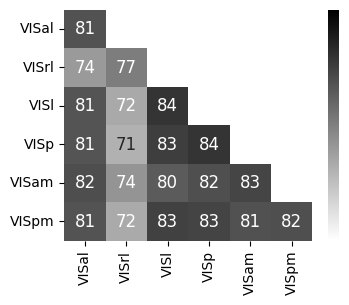

/tmp/ipykernel_299383/3817730768.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
/tmp/ipykernel_299383/3817730768.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[


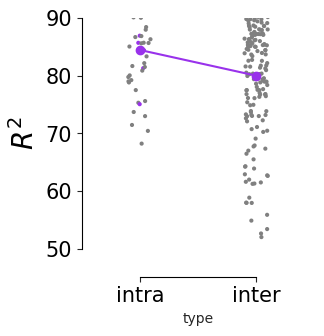

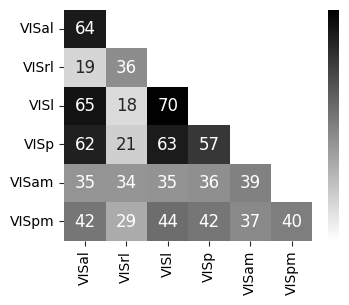

/tmp/ipykernel_299383/3817730768.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
/tmp/ipykernel_299383/3817730768.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[


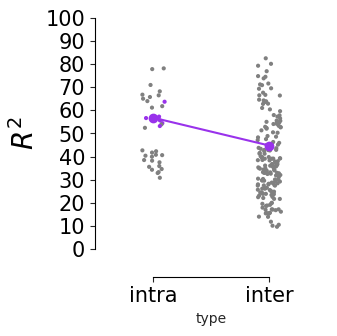

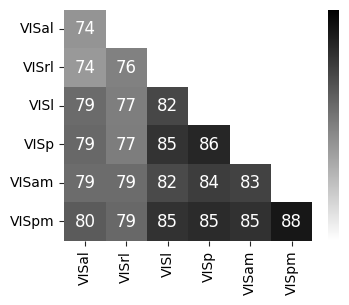

/tmp/ipykernel_299383/3817730768.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
/tmp/ipykernel_299383/3817730768.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[


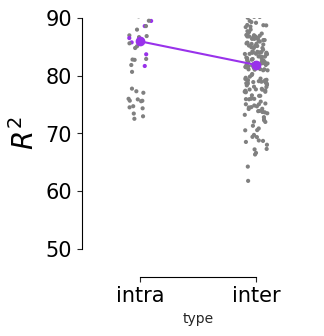

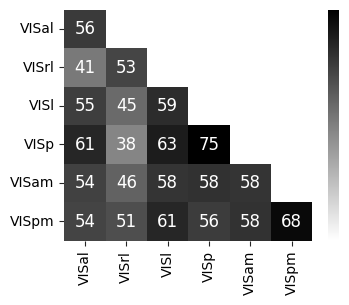

/tmp/ipykernel_299383/3817730768.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  intra_median = df[(df["area_type"] == area) & (df["type"] == "intra")].mean()
/tmp/ipykernel_299383/3817730768.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_related_inter_median = df[


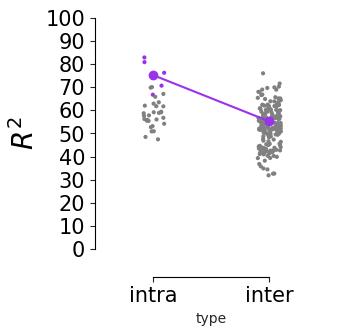

In [9]:
for m in ["ca", "np"]:
    for s in ["behavior", "time"]:
        if s == "behavior":
            vmin = 70
            vmax = 90
        else:
            vmin = 10
            vmax = 70
        make_heatmap_from_df(
            pd.DataFrame(data["cortical_consistency"][s][m]["cortices"]),
            f"{m}-{s}",
            vmin,
            vmax,
        )
        if s == "behavior":
            vmin = 50
            vamx = 100
        else:
            vmin = 0
            vmax = 100
        d = make_line_strip_from_df(
            data["cortical_consistency"][s][m]["v1"], f"{m}-{s}", vmin, vmax
        )
        intra_VISp = d[(d["type"] == "intra") & (d["area_type"] == "primary")]["value"]
        inter_VISp = d[
            (d["type"] == "inter") & ((d["area1"] == "VISp") | (d["area2"] == "VISp"))
        ]["value"]

### CEBRA + kNN decoding performance (see Methods)

- CEBRA embeddings of different output embedding dimensions, from calcium (2P) data or Neuropixels, as denoted.

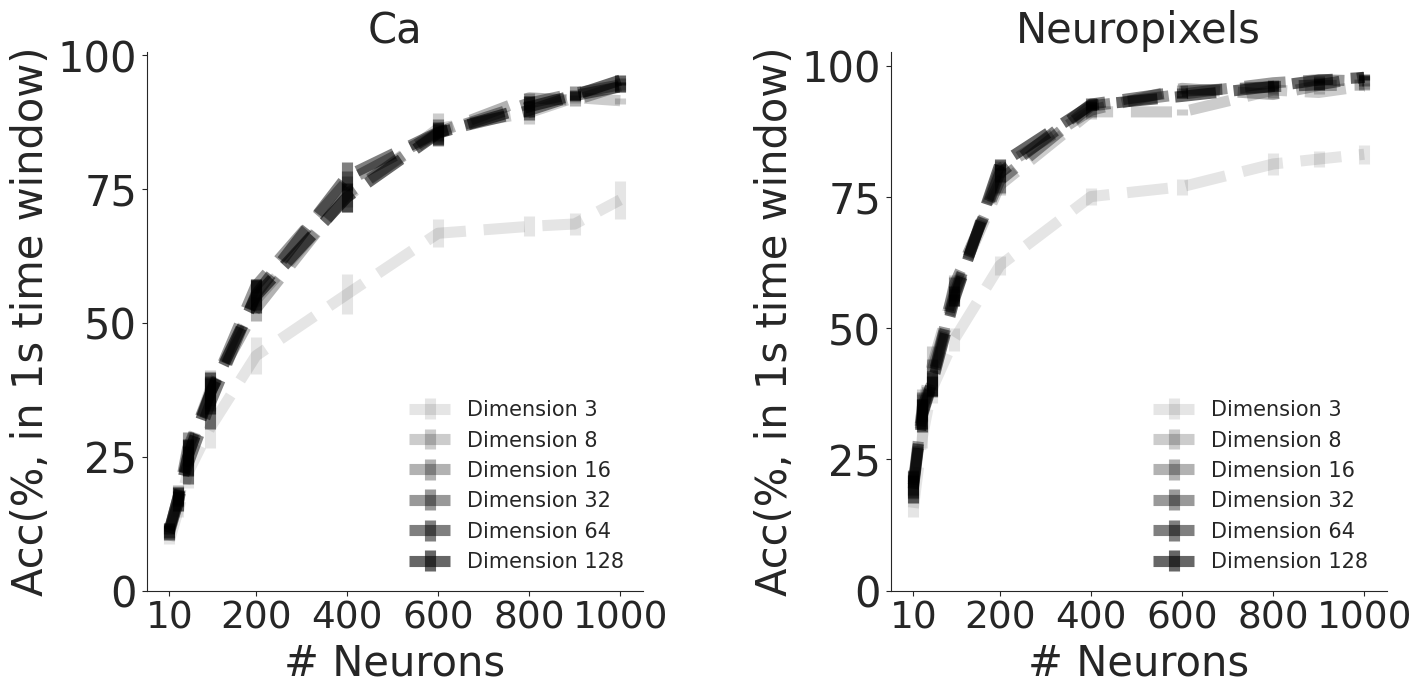

In [10]:
def mean_err(accs):
    accs = np.array(accs).reshape(10, 5)
    means = np.zeros(10)
    errors = np.zeros(10)
    for i, n in enumerate(accs):
        mask = n != None
        mean = n[mask].sum() / mask.sum()
        means[i] = mean
        error = np.std(n[mask], ddof=1) / np.sqrt(n[mask].size)
        errors[i] = error
    return means, errors


def set_ax(ax):
    _num_neurons = [10, 200, 400, 600, 800, 1000]
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xticks(_num_neurons, _num_neurons, fontsize=27)
    ax.set_yticks(
        np.linspace(0, 100, 5), np.linspace(0, 100, 5).astype(int), fontsize=30
    )
    ax.set_xlabel("# Neurons", fontsize=30)
    ax.set_ylabel("Acc(%, in 1s time window)", fontsize=30)
    l1 = ax.legend(fontsize=15, loc="lower right", title_fontsize=15, frameon=False)


fig = plt.figure(figsize=(16, 7))
plt.subplots_adjust(wspace=0.5)

ns = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]
dims = [3, 8, 16, 32, 64, 128]

ca_dims = data["decoding"]["ca_dims"]
np_dims = data["decoding"]["np_dims"]

for k, (data_dims, modality) in enumerate(
    zip([ca_dims, np_dims], ["Ca", "Neuropixels"])
):
    ax = plt.subplot(1, 2, k + 1)
    for i, d in enumerate(dims):
        mean = data_dims["mean"][d]
        err = data_dims["err"][d]
        a = (i + 1) * 0.1
        ax.errorbar(
            ns,
            mean,
            err,
            ls="--",
            label=f"Dimension {d}",
            color="k",
            alpha=a,
            markersize=20,
            linewidth=8,
        )

    set_ax(ax)
    plt.title(f"{modality}", fontsize=30)

### Decoding accuracy:

- measured by considering predicted frame being within 1 sec difference to true frame as correct prediction using CEBRA (2P only), jointly trained (2P+NP), or a baseline population vector kNN decoder (using the time window 33 ms (single frame), or 330 ms (10 frame receptive field).

- single frame decoding performance (1 frame receptive field) using kNN, bayes baseline, CEBRA (NP only) and jointly trained CEBRA (2P + NP), as done in Figure 5 e), f).

- Decoding performance from 2P data from different visual cortical areas from different layers using a 10 frame window CEBRA-behavior model using DINO features with 128 output dimension.

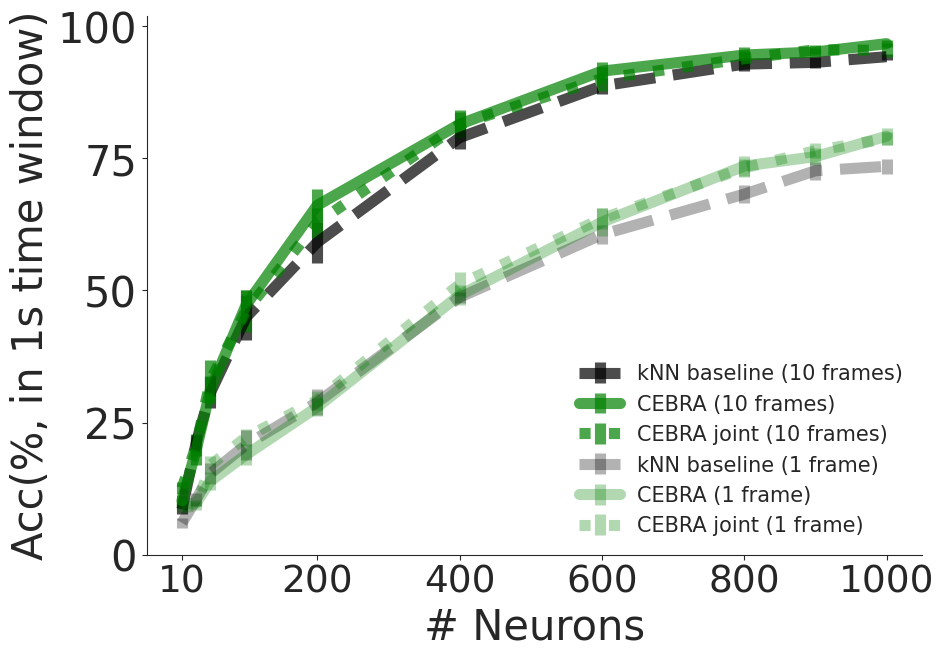

In [11]:
ca_decoding = data["decoding"]["ca_pseudo_mouse"]
fig = plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
colors = {
    "cebra_330": "g",
    "cebra_33": "g",
    "cebra_joint_330": "g",
    "cebra_joint_33": "g",
    "baseline_330": "k",
    "baseline_33": "k",
}
alphas = {
    "cebra_330": 0.7,
    "cebra_33": 0.3,
    "cebra_joint_330": 0.7,
    "cebra_joint_33": 0.3,
    "baseline_330": 0.7,
    "baseline_33": 0.3,
}
styles = {
    "cebra_330": "solid",
    "cebra_33": "solid",
    "cebra_joint_330": "dotted",
    "cebra_joint_33": "dotted",
    "baseline_330": "--",
    "baseline_33": "--",
}
labels = {
    "cebra_330": "CEBRA (10 frames)",
    "cebra_33": "CEBRA (1 frame)",
    "cebra_joint_330": "CEBRA joint (10 frames)",
    "cebra_joint_33": "CEBRA joint (1 frame)",
    "baseline_330": "kNN baseline (10 frames)",
    "baseline_33": "kNN baseline (1 frame)",
}
for key in [
    "baseline_330",
    "cebra_330",
    "cebra_joint_330",
    "baseline_33",
    "cebra_33",
    "cebra_joint_33",
]:
    ax.errorbar(
        ns,
        ca_decoding["mean"][key],
        ca_decoding["err"][key],
        lw=8,
        ls=styles[key],
        alpha=alphas[key],
        c=colors[key],
        label=labels[key],
    )
set_ax(ax)

In [12]:
frame_np_bayes_baseline_33_err = data["frame_err"]["bayes"]["np_baseline_33"]
frame_np_knn_baseline_33_err = data["frame_err"]["knn"]["np_baseline_33"]
frame_np_cebra_knn_33_err = data["frame_err"]["knn"]["np_cebra_33"]
frame_np_joint_cebra_knn_33_err = data["frame_err"]["knn"]["np_cebra_joint_33"]

In [13]:
num_neurons = [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]


def set_ax(ax, white_c):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_color(white_c)
    ax.spines["bottom"].set_color(white_c)
    ax.set_xticks(
        [10, 200, 400, 600, 800, 1000],
        [10, 200, 400, 600, 800, 1000],
        fontsize=30,
        color=white_c,
    )
    ax.set_yticks(
        np.linspace(0, 100, 5),
        np.linspace(0, 100, 5, dtype=int),
        fontsize=30,
        color=white_c,
    )
    ax.set_xlabel("# Neurons", fontsize=35, color=white_c)
    ax.set_ylabel("Acc (%, in 1s time window)", fontsize=35, color=white_c)
    ax.tick_params(colors=white_c)
    l1 = ax.legend(fontsize=18, loc="best", title_fontsize=18, frameon=False)

    for text in l1.get_texts():
        text.set_color(white_c)


def n_mean_err(dic, ns=num_neurons):
    means = []
    errs = []
    for n in ns:
        means.append(np.mean(dic[n]))
        errs.append(np.std(dic[n]) / np.sqrt(len(dic[n])))
    return np.array(means), np.array(errs)


def n_mean_err_joint(dic, modality, ns=num_neurons):
    means = []
    errs = []
    if modality == "np":
        ind = 1
    elif modality == "ca":
        ind = 0
    for n in ns:
        _d = np.array(dic[n])[:, ind]
        means.append(np.mean(_d))
        errs.append(np.std(_d) / np.sqrt(len(_d)))
    return np.array(means), np.array(errs)


def n_mean_err_frame_diff(err_dict, ns=num_neurons):
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs = [np.mean(abs(seed_result)) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs) / np.sqrt(len(accs)))
    return means, errs


def n_mean_err_frame_diff_joint(err_dict, data_type="np", ns=num_neurons):
    if data_type == "np":
        index = 1
    else:
        index = 0
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs = [np.mean(abs(seed_result[index])) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs) / np.sqrt(len(accs)))
    return means, errs

Text(0, 0.5, 'Frame difference')

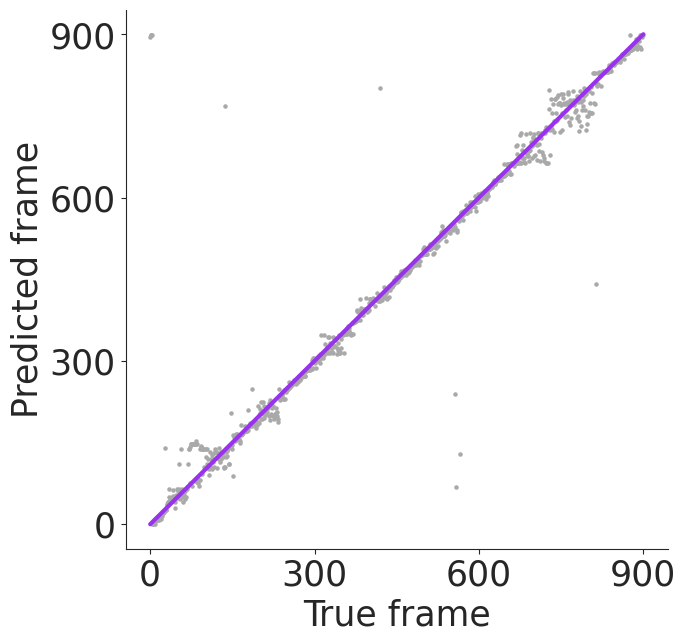

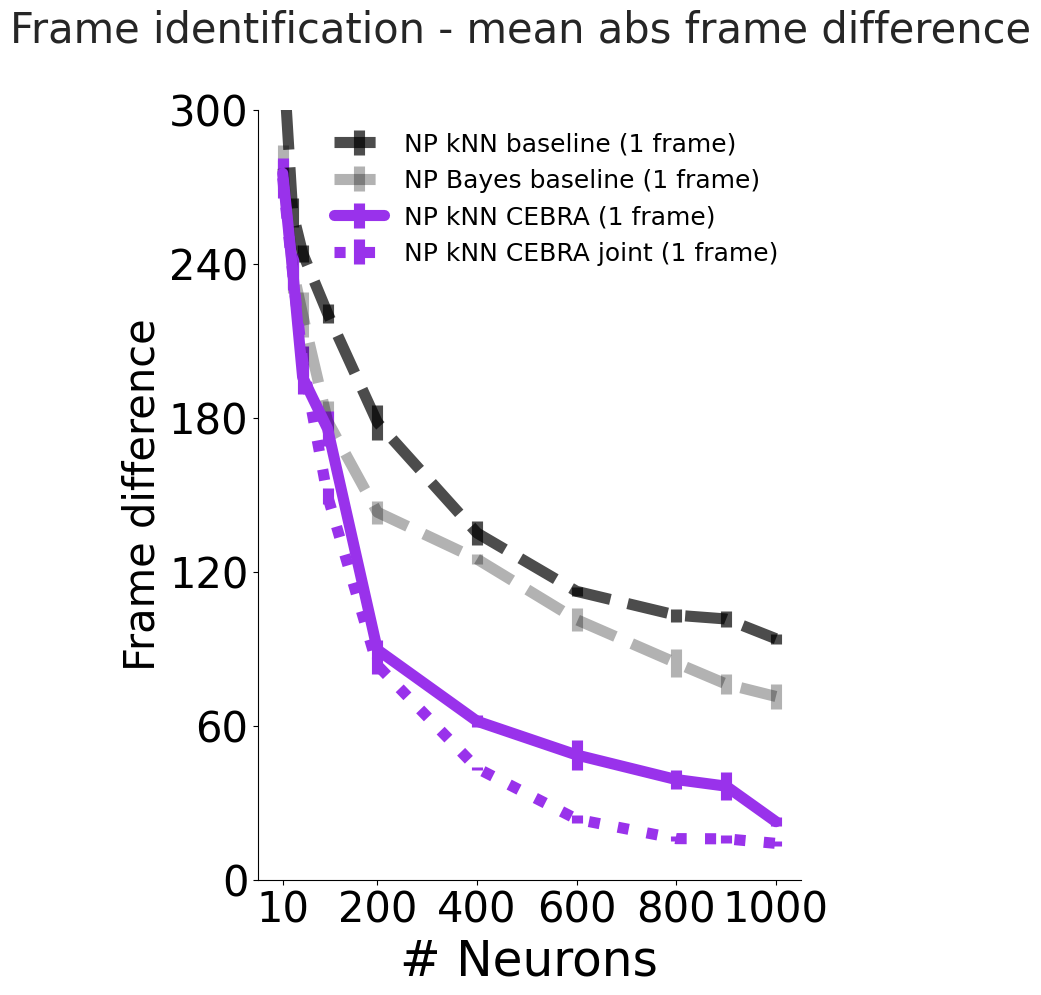

In [14]:
white = False

if white:
    white_c = "white"
else:
    white_c = "black"

fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
frame_err = frame_np_cebra_knn_33_err[1000][1]
ax.scatter(np.arange(len(frame_err)), np.arange(900) + frame_err, s=5, c="darkgray")
ax.plot(
    (0, len(frame_err)),
    (0, 900),
    c="#9932EB",
    lw=3,
)
ax.set_xticks(np.linspace(0, 900, 4), np.linspace(0, 900, 4).astype(int), fontsize=25)
ax.set_yticks(np.linspace(0, 900, 4), np.linspace(0, 900, 4).astype(int), fontsize=25)
ax.set_xlabel("True frame", fontsize=25)
ax.set_ylabel("Predicted frame", fontsize=25)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


fig_33 = plt.figure(figsize=(7, 10))
fig_33.suptitle(f"Frame identification - mean abs frame difference", fontsize=30)
plt.subplots_adjust(wspace=0.5)
ax1 = plt.subplot(111)

c = "#9932EB"

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[0],
    n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[1],
    ls="--",
    label="NP kNN baseline (1 frame)",
    color="k",
    alpha=0.7,
    markersize=20,
    linewidth=8,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[0],
    n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[1],
    ls="--",
    label="NP Bayes baseline (1 frame)",
    color="k",
    alpha=0.3,
    markersize=20,
    linewidth=8,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[0],
    n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[1],
    label="NP kNN CEBRA (1 frame)",
    color=c,
    alpha=1,
    markersize=20,
    linewidth=8,
)

ax1.errorbar(
    num_neurons,
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err, "np")[0],
    n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err, "np")[1],
    ls="dotted",
    label="NP kNN CEBRA joint (1 frame)",
    color=c,
    alpha=1,
    markersize=20,
    linewidth=8,
)

ax1.set_ylim(0, 300)
set_ax(ax1, white_c)
ax1.set_yticks(
    np.linspace(0, 300, 6),
    np.linspace(0, 300, 6, dtype=int),
    fontsize=30,
    color=white_c,
)
ax1.set_ylabel("Frame difference", fontsize=30)

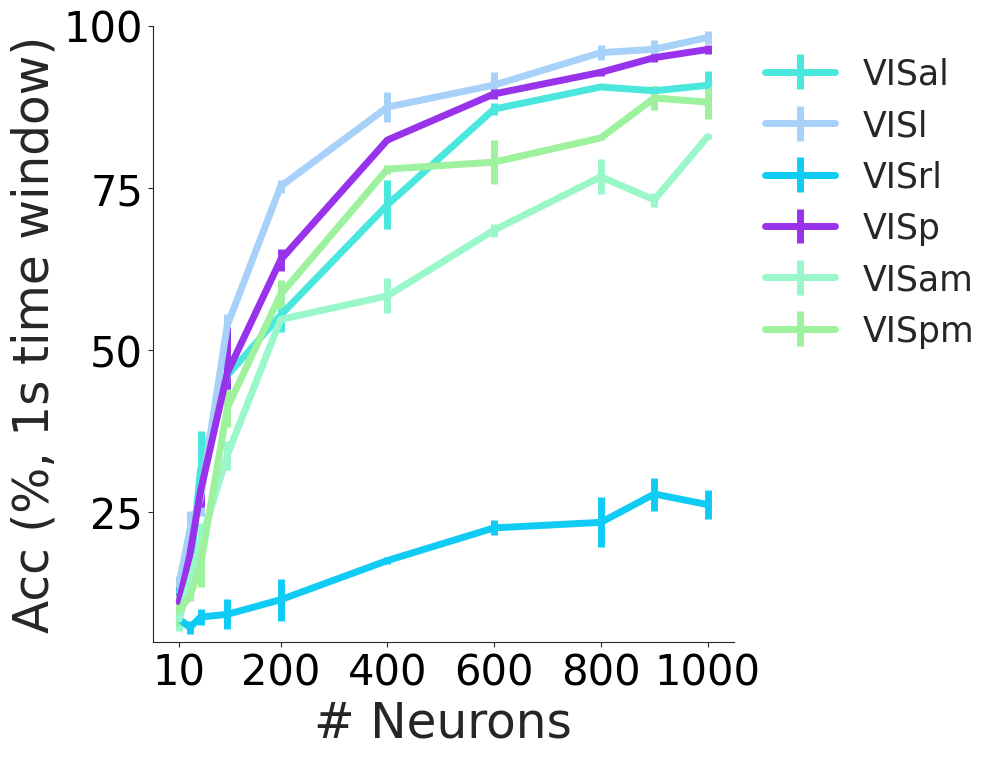

In [15]:
colors = {
    "VISl": "#A7D1F9",
    "VISrl": "#10CCF5",
    "VISal": "#49E7DD",
    "VISp": "#9932EB",
    "VISam": "#99F7CA",
    "VISpm": "#9EF19D",
}

ca_decoding = data["ca_area"]

fig = plt.figure(figsize=(7.5, 8))
# plt.title('Decoding by cortical area - DINO feature', fontsize=35, y=1.1)
ax = plt.subplot(111)
for area in ["VISal", "VISl", "VISrl", "VISp", "VISam", "VISpm"]:
    ax.errorbar(
        [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000],
        [
            np.mean(ca_decoding[area][k])
            for k in [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]
        ],
        [
            np.std(ca_decoding[area][k]) / np.sqrt(len(ca_decoding[area][k]))
            for k in [10, 30, 50, 100, 200, 400, 600, 800, 900, 1000]
        ],
        label=area,
        lw=5,
        color=colors[area],
    )

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xticks(
    [10, 200, 400, 600, 800, 1000],
    [10, 200, 400, 600, 800, 1000],
    fontsize=30,
    color="k",
)

plt.yticks(
    np.linspace(0, 100, 5), np.linspace(0, 100, 5, dtype=int), color="k", fontsize=30
)

plt.xlabel("# Neurons", fontsize=35)
plt.ylabel("Acc (%, 1s time window)", fontsize=35)
plt.ylim(5, 100)
l = plt.legend(frameon=False, bbox_to_anchor=[1, 1], fontsize=25)